In [1]:
# Cell 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Ensure the file path is correct and the file exists
ds = pd.read_csv("advertising.csv")  # Update the path to include the 'datasets' folder

# Display the first few rows to confirm successful loading
ds.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# Cell 3: Summary Statistics
summary = ds.describe()
range_vals = ds.max() - ds.min()
variance = ds.var()

print("Summary Statistics:\n", summary)
print("\nRange:\n", range_vals)
print("\nVariance:\n", variance)


Summary Statistics:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

Range:
 TV           295.7
Radio         49.6
Newspaper    113.7
Sales         25.4
dtype: float64

Variance:
 TV           7370.949893
Radio         220.427743
Newspaper     474.308326
Sales          27.919517
dtype: float64


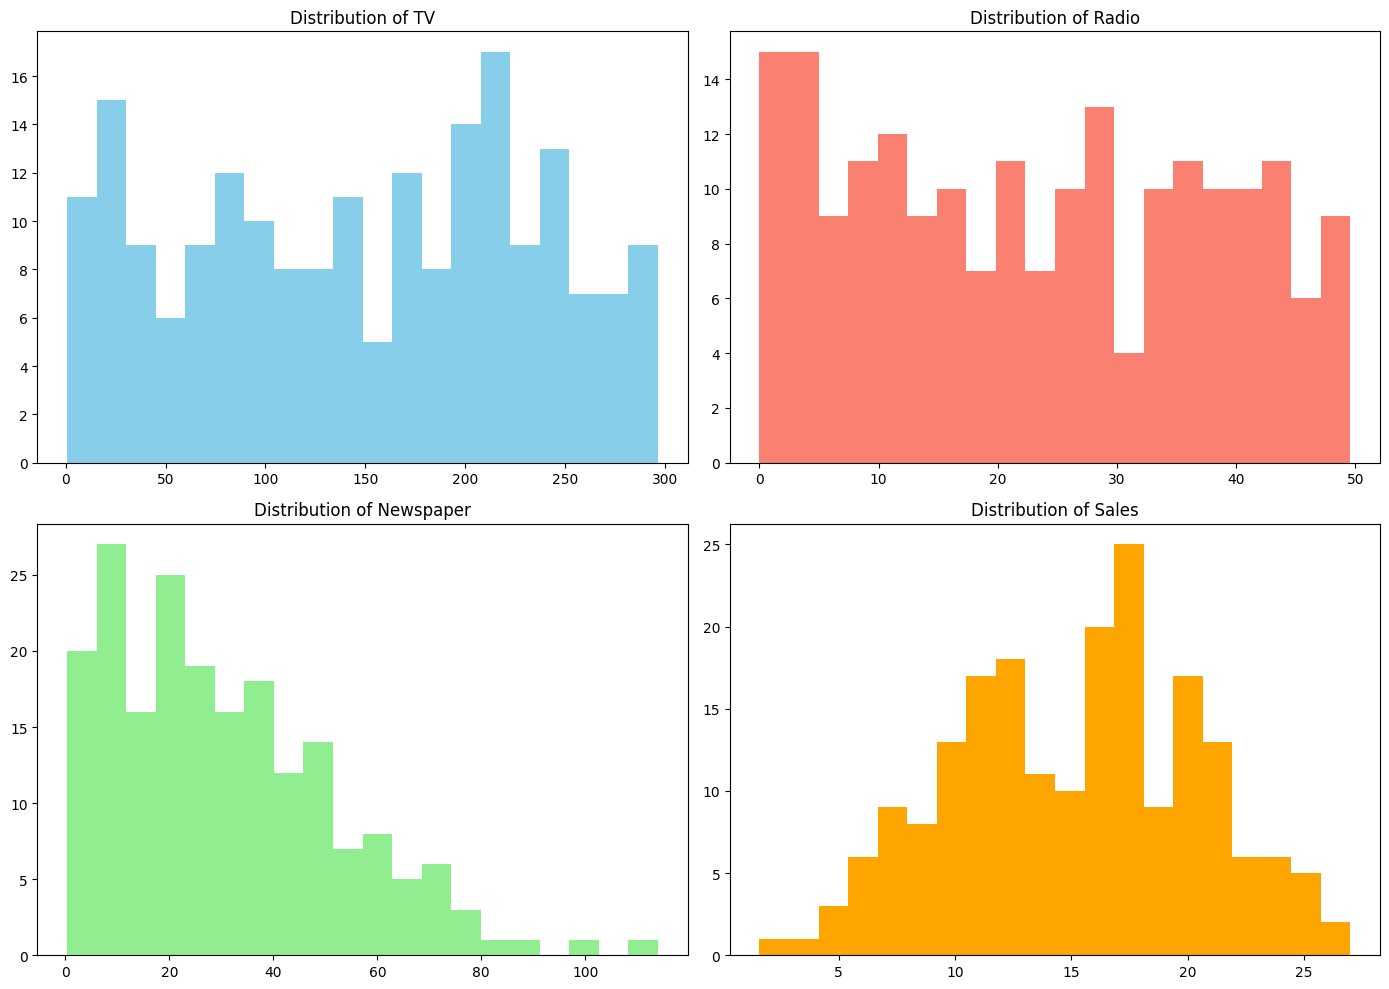

In [4]:
# Cell 4: Plot Histograms of Features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(ds['TV'], bins=20, color='skyblue')
axes[0, 0].set_title("Distribution of TV")

axes[0, 1].hist(ds['Radio'], bins=20, color='salmon')
axes[0, 1].set_title("Distribution of Radio")

axes[1, 0].hist(ds['Newspaper'], bins=20, color='lightgreen')
axes[1, 0].set_title("Distribution of Newspaper")

axes[1, 1].hist(ds['Sales'], bins=20, color='orange')
axes[1, 1].set_title("Distribution of Sales")

plt.tight_layout()
plt.show()


In [5]:
# Cell 5: Data Cleaning - Check and handle missing values
print("Missing values:\n", ds.isnull().sum())

# Fill missing values with mean (if any)
ds.fillna(ds.mean(), inplace=True)

# Confirm cleaning
print("\nAfter cleaning:\n", ds.isnull().sum())


Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

After cleaning:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [6]:
# Cell 6: Data Transformation - Feature scaling
scaler = StandardScaler()
ds_scaled = pd.DataFrame(scaler.fit_transform(ds), columns=ds.columns)
ds_scaled.head()


,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.322319
1,-1.197376,1.082808,0.669579,-0.897515
2,-1.516155,1.528463,1.783549,-0.593948
3,0.052050,1.217855,1.286405,0.259834
4,0.394182,-0.841614,1.281802,0.525455


In [7]:
# Cell 7: Create classification target
# Let's classify 'Sales' into categories: Low, Medium, High
# Based on quantiles
ds_scaled['SalesCategory'] = pd.qcut(ds['Sales'], q=3, labels=['Low', 'Medium', 'High'])

# Drop original 'Sales' (optional, depending on modeling choice)
ds_scaled.drop(columns=['Sales'], inplace=True)


In [8]:
# Cell 8: Prepare data for classification
X = ds_scaled.drop('SalesCategory', axis=1)
y = ds_scaled['SalesCategory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Cell 9: Model Building - Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

        High       0.92      1.00      0.96        11
         Low       1.00      0.89      0.94        18
      Medium       0.83      0.91      0.87        11

    accuracy                           0.93        40
   macro avg       0.92      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40


Confusion Matrix:
 [[11  0  0]
 [ 0 16  2]
 [ 1  0 10]]


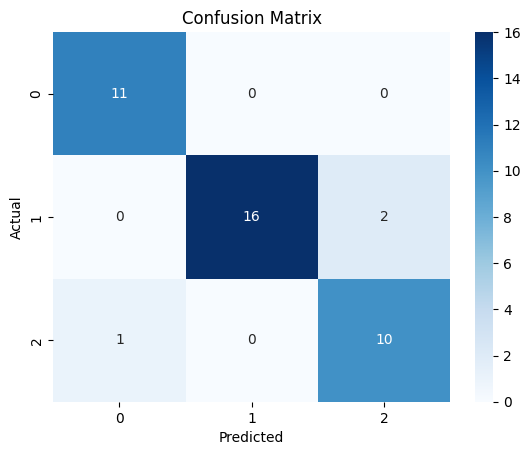

In [10]:
# Cell 10: Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
